In [2]:
!python --version

Python 3.13.7


In [3]:
from google import genai
from dotenv import load_dotenv
import os

load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY", "")
client = genai.Client(api_key=GEMINI_API_KEY)

In [4]:
import json

with open(r"C:\Auto\HCI-Summarize_agent\data\query\week1_09-09_to_09-15.json", "r", encoding="utf-8") as f:
    news = json.load(f)

print(list(news.keys()))

['Nvidia', 'AMD', 'Intel']


In [5]:
news['Nvidia']

[{'headline': "Nvidia is the world's most valuable company. Why does CEO Jensen Huang barely make the list of the 10 wealthiest people?",
  'content': "This story is available exclusively to Business Insider subscribers. Become an Insider and start reading now.\n\nThe list of the world's wealthiest people mostly comprises the biggest shareholders of the largest companies on the planet. So why does the cofounder and CEO of the world's most valuable company rank just 10th?\n\nAs of Monday's close, Nvidia's Jensen Huang had a net worth of $147 billion, per the Bloomberg Billionaires Index.\n\nThat puts him just behind Warren Buffett, who has a $148 billion fortune, even though Buffett's Berkshire Hathaway is worth about a quarter as much as Nvidia, and Buffett has gifted more than half of his Berkshire stock to foundations since 2006.\n\nBernard Arnault ranks eighth with a $164 billion fortune, despite LVMH being worth under $300 billion, or less than a 10th of Nvidia.\n\nElon Musk, the w

In [12]:
for chipmaker, data in news.items():
    print(f"Processing news for {chipmaker}")
    dict_cnt = {}

    for article in data:
        ts = article['timestamp']

        if ts not in dict_cnt:
            dict_cnt[ts] = {'cnt': 0, 'null': 0}

        dict_cnt[ts]['cnt'] += 1

        if article['content'] is None:
            dict_cnt[ts]['null'] += 1

    for k, v in dict_cnt.items():
        print(f"Date: {k}, Total Articles: {v['cnt']}, Null Articles: {v['null']}")

    print()

Processing news for Nvidia
Date: 2025-09-09, Total Articles: 70, Null Articles: 16
Date: 2025-09-10, Total Articles: 10, Null Articles: 2
Date: 2025-09-11, Total Articles: 10, Null Articles: 2
Date: 2025-09-12, Total Articles: 10, Null Articles: 2
Date: 2025-09-13, Total Articles: 10, Null Articles: 3
Date: 2025-09-14, Total Articles: 10, Null Articles: 1
Date: 2025-09-15, Total Articles: 10, Null Articles: 0

Processing news for AMD
Date: 2025-09-09, Total Articles: 63, Null Articles: 16
Date: 2025-09-10, Total Articles: 10, Null Articles: 1
Date: 2025-09-11, Total Articles: 10, Null Articles: 0
Date: 2025-09-12, Total Articles: 10, Null Articles: 2
Date: 2025-09-13, Total Articles: 10, Null Articles: 1
Date: 2025-09-14, Total Articles: 10, Null Articles: 0
Date: 2025-09-15, Total Articles: 10, Null Articles: 1

Processing news for Intel
Date: 2025-09-09, Total Articles: 70, Null Articles: 18
Date: 2025-09-10, Total Articles: 10, Null Articles: 1
Date: 2025-09-11, Total Articles: 10, 

In [13]:
import random

for chipmaker, data in news.items():
    print(f"Processing {chipmaker}")

    grouped = {}
    for article in data:
        ts = article['timestamp']
        grouped.setdefault(ts, []).append(article)

    new_articles = []

    for ts, articles in grouped.items():
        null_articles = [a for a in articles if a['content'] is None]
        valid_articles = [a for a in articles if a['content'] is not None]

        total_count = len(articles)

        if total_count > 10:
            keep_count = 10
            if len(valid_articles) > keep_count:
                valid_articles = random.sample(valid_articles, keep_count)
            new_articles.extend(valid_articles)

        else:
            new_articles.extend(valid_articles)

    news[chipmaker] = new_articles

Processing Nvidia
Processing AMD
Processing Intel


In [14]:
for chipmaker, data in news.items():
    print(f"Processing news for {chipmaker}")
    dict_cnt = {}

    for article in data:
        ts = article['timestamp']

        if ts not in dict_cnt:
            dict_cnt[ts] = {'cnt': 0, 'null': 0}

        dict_cnt[ts]['cnt'] += 1

        if article['content'] is None:
            dict_cnt[ts]['null'] += 1

    for k, v in dict_cnt.items():
        print(f"Date: {k}, Total Articles: {v['cnt']}, Null Articles: {v['null']}")

    print()

Processing news for Nvidia
Date: 2025-09-09, Total Articles: 10, Null Articles: 0
Date: 2025-09-10, Total Articles: 8, Null Articles: 0
Date: 2025-09-11, Total Articles: 8, Null Articles: 0
Date: 2025-09-12, Total Articles: 8, Null Articles: 0
Date: 2025-09-13, Total Articles: 7, Null Articles: 0
Date: 2025-09-14, Total Articles: 9, Null Articles: 0
Date: 2025-09-15, Total Articles: 10, Null Articles: 0

Processing news for AMD
Date: 2025-09-09, Total Articles: 10, Null Articles: 0
Date: 2025-09-10, Total Articles: 9, Null Articles: 0
Date: 2025-09-11, Total Articles: 10, Null Articles: 0
Date: 2025-09-12, Total Articles: 8, Null Articles: 0
Date: 2025-09-13, Total Articles: 9, Null Articles: 0
Date: 2025-09-14, Total Articles: 10, Null Articles: 0
Date: 2025-09-15, Total Articles: 9, Null Articles: 0

Processing news for Intel
Date: 2025-09-09, Total Articles: 10, Null Articles: 0
Date: 2025-09-10, Total Articles: 9, Null Articles: 0
Date: 2025-09-11, Total Articles: 10, Null Articles

In [ ]:
from typing import Optional
from pydantic import BaseModel

class Relation(BaseModel):
    verb: str
    detail: Optional[str] = None

class Triplet(BaseModel):
    subject: str
    relation: Relation
    object: str

triplet_schema = {
    "type": "ARRAY",
    "items": {
        "type": "OBJECT",
        "properties": {
            "subject": {"type": "STRING"},
            "relation": {
                "type": "OBJECT",
                "properties": {
                    "verb": {"type": "STRING"},
                    "detail": {"type": "STRING"},
                },
                "required": ["verb"]
            },
            "object": {"type": "STRING"}
        },
        "required": ["subject", "relation", "object"]
    }
}


extract_prompt = """
You are an information extraction system. Read the news articles and extract factual triplets.

CONTEXT:
- Focus only on **{chipmaker}**
- Ignore information not directly related to {chipmaker}.
- Do not add opinions, speculation, or commentary.

TASK:
- Convert the news summary into a list of triplets following the Triplet schema.

Triplet schema (Python syntax):
[
  {{
    "subject": "<one word entity>",
    "relation": {{
      "verb": "<simple present tense verb>",
      "detail": "<concise relation detail or None>"
    }},
    "object": "<one word entity>"
  }}
]

RULES:
- Use simple present tense verbs only (e.g., "acquire", "announce", "invest").
- Subject and object must be specific entities expressed in **one word** (company, person, place, or date).
- If detail exists (amount, date, location, extra context), put it in `relation.detail`.
- Preserve important entities (companies, people, places, dates).
- Avoid redundancy, trivial details, and long phrases.
- The output must be valid Python syntax (a list of Triplet dictionaries).
- Extract only triplets about **{chipmaker}**.

ARTICLES:
{articles}
"""

In [21]:
from tqdm import tqdm
import re
from datetime import datetime

def clean_text(text: str | None) -> str:
    if not text:
        return ""
    return re.sub(r"\s+", " ", text).strip()

def group_articles_by_date(articles: list[dict]) -> dict[str, str]:
    grouped = {}
    for article in articles:
        date = article.get("timestamp")
        desc = clean_text(article.get("content"))

        # Skip if missing
        if not date or not desc:
            continue

        grouped.setdefault(date, []).append(desc)

    # Join all descriptions per date
    return {
        date: "\n".join(descs)
        for date, descs in grouped.items()
    }

def extract_triplets(chipmaker: str, articles: str) -> list[Triplet]:
    """Call Gemini to extract triplets."""
    if not articles.strip():
        return []

    response = client.models.generate_content(
        model="gemini-2.5-flash",
        contents=extract_prompt.format(
            chipmaker=chipmaker,
            articles=articles,
        ),
        config={
            "response_mime_type": "application/json",
            "response_schema": triplet_schema, 
        },
    )

    return [Triplet(**t) for t in response.parsed]

def process_news(news: dict[str, list[dict]]) -> dict[str, list[dict]]:
    """Process all chipmakers and return structured triplets by date."""
    result = {}
    for chipmaker, articles in news.items():
        print(f"\n🔎 Processing chipmaker: {chipmaker}")
        print(f"Number of news articles: {len(articles)}")

        # Group articles by date
        dict_date_news = group_articles_by_date(articles)

        # Sort dates (skip invalid ones)
        try:
            date_news = sorted(
                dict_date_news.keys(),
                key=lambda d: datetime.strptime(d, "%Y-%m-%d"),
                reverse=True,
            )
        except ValueError:
            # Skip invalid dates
            date_news = [
                d for d in dict_date_news.keys()
                if re.match(r"^\d{4}-\d{2}-\d{2}$", d)
            ]
            date_news = sorted(
                date_news,
                key=lambda d: datetime.strptime(d, "%Y-%m-%d"),
                reverse=True,
            )

        result[chipmaker] = []
        for date in tqdm(date_news, desc=f"Processing {chipmaker}"):
            article_text = dict_date_news[date]
            print(f"{date}: {article_text.count('\\n')+1 if article_text else 0} articles with valid descriptions")

            triplets = extract_triplets(chipmaker, article_text)
            result[chipmaker].append({"date": date, "triplets": triplets})

    return result

result = process_news(news)


🔎 Processing chipmaker: Nvidia
Number of news articles: 60


Processing Nvidia:   0%|          | 0/7 [00:00<?, ?it/s]

2025-09-15: 1 articles with valid descriptions


Processing Nvidia:  14%|█▍        | 1/7 [00:49<04:54, 49.07s/it]

2025-09-14: 1 articles with valid descriptions


Processing Nvidia:  29%|██▊       | 2/7 [01:41<04:16, 51.20s/it]

2025-09-13: 1 articles with valid descriptions


Processing Nvidia:  43%|████▎     | 3/7 [02:19<02:59, 44.91s/it]

2025-09-12: 1 articles with valid descriptions


Processing Nvidia:  57%|█████▋    | 4/7 [03:01<02:11, 43.87s/it]

2025-09-11: 1 articles with valid descriptions


Processing Nvidia:  71%|███████▏  | 5/7 [03:59<01:37, 48.87s/it]

2025-09-10: 1 articles with valid descriptions


Processing Nvidia:  86%|████████▌ | 6/7 [04:40<00:46, 46.14s/it]

2025-09-09: 1 articles with valid descriptions


Processing Nvidia: 100%|██████████| 7/7 [05:12<00:00, 44.70s/it]



🔎 Processing chipmaker: AMD
Number of news articles: 65


Processing AMD:   0%|          | 0/7 [00:00<?, ?it/s]

2025-09-15: 1 articles with valid descriptions


Processing AMD:  14%|█▍        | 1/7 [01:15<07:34, 75.70s/it]

2025-09-14: 1 articles with valid descriptions


Processing AMD:  29%|██▊       | 2/7 [02:23<05:56, 71.20s/it]

2025-09-13: 1 articles with valid descriptions


Processing AMD:  43%|████▎     | 3/7 [04:18<06:04, 91.19s/it]

2025-09-12: 1 articles with valid descriptions


Processing AMD:  57%|█████▋    | 4/7 [05:01<03:36, 72.13s/it]

2025-09-11: 1 articles with valid descriptions


Processing AMD:  71%|███████▏  | 5/7 [06:12<02:23, 71.76s/it]

2025-09-10: 1 articles with valid descriptions


Processing AMD:  86%|████████▌ | 6/7 [07:31<01:14, 74.08s/it]

2025-09-09: 1 articles with valid descriptions


Processing AMD: 100%|██████████| 7/7 [08:54<00:00, 76.36s/it]



🔎 Processing chipmaker: Intel
Number of news articles: 66


Processing Intel:   0%|          | 0/7 [00:00<?, ?it/s]

2025-09-15: 1 articles with valid descriptions


Processing Intel:  14%|█▍        | 1/7 [00:51<05:06, 51.04s/it]

2025-09-14: 1 articles with valid descriptions


Processing Intel:  29%|██▊       | 2/7 [02:17<06:00, 72.10s/it]

2025-09-13: 1 articles with valid descriptions


Processing Intel:  43%|████▎     | 3/7 [02:45<03:27, 51.96s/it]

2025-09-12: 1 articles with valid descriptions


Processing Intel:  57%|█████▋    | 4/7 [03:54<02:55, 58.45s/it]

2025-09-11: 1 articles with valid descriptions


Processing Intel:  71%|███████▏  | 5/7 [04:44<01:51, 55.56s/it]

2025-09-10: 1 articles with valid descriptions


Processing Intel:  86%|████████▌ | 6/7 [05:21<00:49, 49.12s/it]

2025-09-09: 1 articles with valid descriptions


Processing Intel: 100%|██████████| 7/7 [06:05<00:00, 52.27s/it]


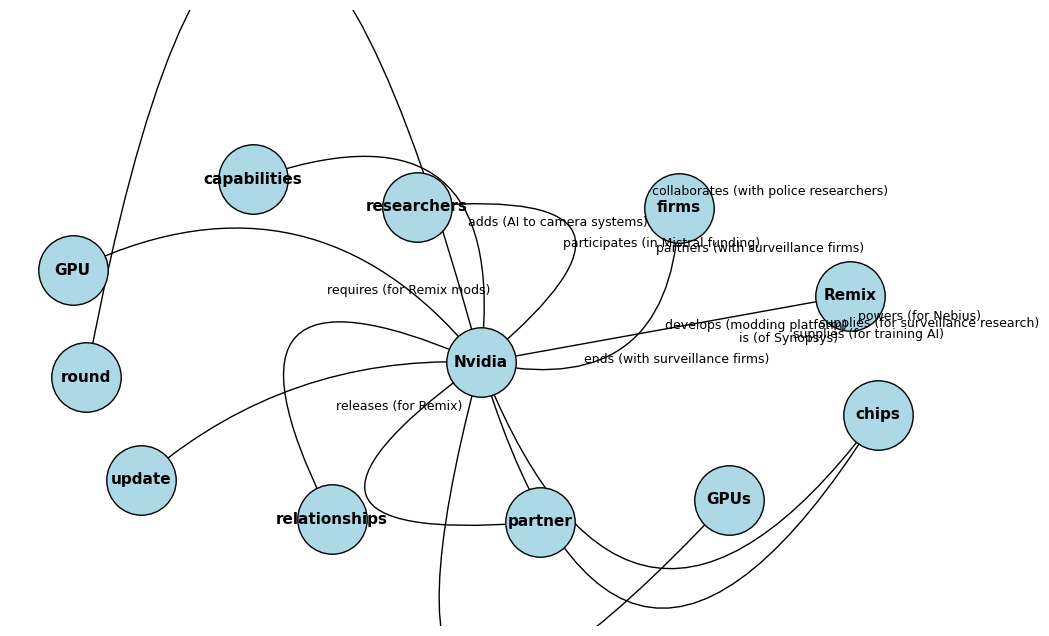

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.MultiDiGraph()

for t in result['Nvidia'][6]['triplets']:
    subj, obj = t.subject, t.object
    verb, detail = t.relation.verb, t.relation.detail

    rel_label = f"{verb} ({detail})" if detail else verb

    G.add_edge(subj, obj, label=rel_label)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(G, pos, node_size=2500, node_color="lightblue", edgecolors="black")
nx.draw_networkx_labels(G, pos, font_size=11, font_weight="bold")

for i, (u, v, key, data) in enumerate(G.edges(keys=True, data=True)):
    rad = 0.2 * (i - (len(G[u][v]) - 1) / 2)
    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        connectionstyle=f"arc3,rad={rad}",
        arrowstyle="->", arrowsize=20
    )
    x = (pos[u][0] + pos[v][0]) / 2
    y = (pos[u][1] + pos[v][1]) / 2
    plt.text(x + rad*0.3, y + rad*0.3, data["label"], fontsize=9, color="black")

plt.axis("off")
plt.show()

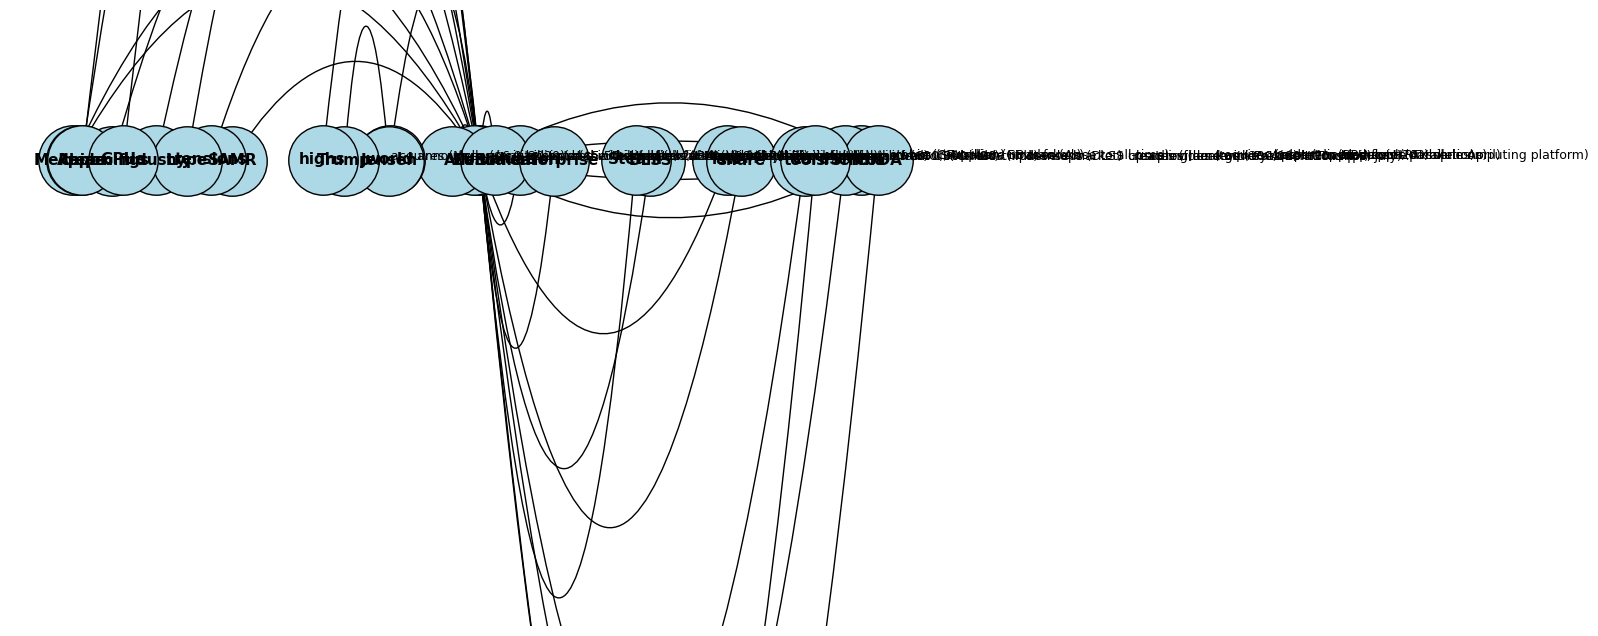

In [25]:
G = nx.MultiDiGraph()

for t in result['Nvidia'][0]['triplets']:
    subj, obj = t.subject, t.object
    verb, detail = t.relation.verb, t.relation.detail

    rel_label = f"{verb} ({detail})" if detail else verb

    G.add_edge(subj, obj, label=rel_label)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(G, pos, node_size=2500, node_color="lightblue", edgecolors="black")
nx.draw_networkx_labels(G, pos, font_size=11, font_weight="bold")

for i, (u, v, key, data) in enumerate(G.edges(keys=True, data=True)):
    rad = 0.2 * (i - (len(G[u][v]) - 1) / 2)
    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        connectionstyle=f"arc3,rad={rad}",
        arrowstyle="->", arrowsize=20
    )
    x = (pos[u][0] + pos[v][0]) / 2
    y = (pos[u][1] + pos[v][1]) / 2
    plt.text(x + rad*0.3, y + rad*0.3, data["label"], fontsize=9, color="black")

plt.axis("off")
plt.show()

In [26]:
import json

serializable_result = {
    chip: [
        {
            "date": entry["date"],
            "triplets": [
                {
                    "subject": t.subject,
                    "relation": {
                        "verb": t.relation.verb,
                        "detail": t.relation.detail
                    },
                    "object": t.object
                }
                for t in entry["triplets"]
            ]
        }
        for entry in entries
    ]
    for chip, entries in result.items()
}

with open("week1.json", mode="w", encoding="utf-8") as f:
    json.dump(serializable_result, f, ensure_ascii=False, indent=2)